### Νευρωνικά Δίκτυα ΣΗΜΜΥ 2018-2019

### Ομάδα Β17


## Στοιχεία ομάδας
### Λαμπρινίδης-Λέντελ Βλαντισλάβ, 03114054

### Μαρμάνης Ιάσων, 03114088

## Εισαγωγή του dataset

1. Το dataset αποτελείται από δεδομένα που έχουν από ασπρό-μαυρες εικόνες που απεικονίζουν τα γράμματα της αγγλικής γλώσσας. Από αυτά έχουν εξαχθεί κάποιες στατιστικές μετρικές όπως ροπές κλπ. Ο ταξινομιστής πρέπει να προβλέψει σε ποιό από τα 26 γράμματα αντιστοιχεί κάθε σύνολο από τα χαρακτηριστικά αυτά.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pprint

In [3]:
data = pd.read_csv('letters.data', header=None)
print(data)

      0   1   2   3   4   5   6   7   8   9   10  11  12  13  14  15  16
0      T   2   8   3   5   1   8  13   0   6   6  10   8   0   8   0   8
1      I   5  12   3   7   2  10   5   5   4  13   3   9   2   8   4  10
2      D   4  11   6   8   6  10   6   2   6  10   3   7   3   7   3   9
3      N   7  11   6   6   3   5   9   4   6   4   4  10   6  10   2   8
4      G   2   1   3   1   1   8   6   6   6   6   5   9   1   7   5  10
5      S   4  11   5   8   3   8   8   6   9   5   6   6   0   8   9   7
6      B   4   2   5   4   4   8   7   6   6   7   6   6   2   8   7  10
7      A   1   1   3   2   1   8   2   2   2   8   2   8   1   6   2   7
8      J   2   2   4   4   2  10   6   2   6  12   4   8   1   6   1   7
9      M  11  15  13   9   7  13   2   6   2  12   1   9   8   1   1   8
10     X   3   9   5   7   4   8   7   3   8   5   6   8   2   8   6   7
11     O   6  13   4   7   4   6   7   6   3  10   7   9   5   9   5   8
12     G   4   9   6   7   6   7   8   6   2   6   

2. Συνολικά το dataset αποτελείται από 20000 δείγματα με 17 στοιχεία το καθένα. Τα τελευταία 16 από αυτά είναι χαρακτηριστικά, το πρώτο αναφέρει το σωστό γράμμα. Τα χαρακτηριστικά είναι στατιστικά μεγέθη από τα pixels από τα οποία αποτελούνταν οι εικόνες όπως μέσες τιμές και διασπορές. Δεν υπάρχουν μη-διατεταγμένα χαρακτηριστικά.

3. Δεν υπάρχει επικεφαλίδα και οι γραμμές δεν είναι αριθμημένες.

4. Η ετικέτα της κλάσης είναι το πραγματικό γράμμα και βρίσκεται στην πρώτη στήλη κάθε γραμμής.

5. Στα csv δεν κάναμε κάποια εξεργασία (έξω από το notebook).

6. Με `cat *.csv | grep "?" | wc -l` βλέπουμε πως δεν απουσιάζουν τιμές, όπως αναφέρεται ρητά και στην [πηγή](http://archive.ics.uci.edu/ml/datasets/Letter+Recognition) του dataset

In [4]:
X = data.iloc[:,1:].values
y = data.iloc[:,0].values

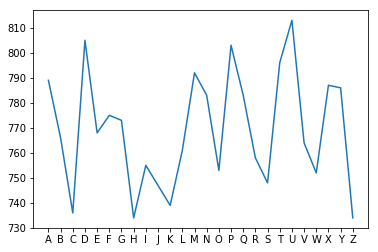

In [5]:
plt.plot(*np.unique(y, return_counts=True))
plt.show()

7. Υπάρχουν 26 κλάσεις, όσα και τα γράμματα του αγγλικού αλφαβήτου. Το dataset φαίνεται αρκετά ισορροπημένο.

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

8. Δεν υπάρχουν απουσιάζουσες τιμές και μη-διατεταγμένα χαρακτηριστικά.

## Baseline classification

### Εκπαίδευση των classifier

#### Initialization

In [7]:
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB

In [8]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools

def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()  
    plt.show()

In [9]:
from sklearn.metrics import f1_score, precision_score, recall_score
import string
import time
metrics = ['macro', 'micro']
clfs = ['dummy', 'gnb', 'knn', 'mlp']
before = {x : {} for x in metrics}
after = {x : {} for x in metrics}
time_fit = {x : {} for x in metrics}
time_pred = {x : {} for x in metrics}

In [10]:
def print_clf_stats(clf, CLF):
  y_pred = CLF.fit(X_train, y_train).predict(X_test)
  cm = confusion_matrix(y_test, y_pred)
  plot_confusion_matrix(cm, string.ascii_uppercase)

  for x in metrics:
    before[x][clf] = 100*f1_score(y_test, y_pred, average=x)
  print('{} classifier : f1 macro = {:.2f}%, f1 micro = {:.2f}%'.format(clf, *[before[x][clf] for x in metrics]))

#### Dummy classifier

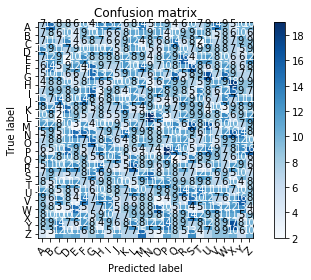

dummy classifier : f1 macro = 3.89%, f1 micro = 3.90%


In [11]:
print_clf_stats('dummy', DummyClassifier())

Με 26 κλάσεις είναι προφανές πως ο dummy classifier δεν μπορεί να έχει μεγάλο ποσοστό επιτυχίας, όπως βλέπουμε και παραπάνω.

#### Gaussian Naive Bayes

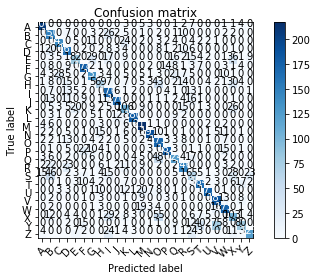

gnb classifier : f1 macro = 63.81%, f1 micro = 64.35%


In [12]:
print_clf_stats('gnb', GaussianNB())

Ο GNB πετυχαίνει αρκετά καλά αποτελέσματα αν λάβουμε υπόψη πως έχουμε 26 κλάσεις.

#### KNN classifier

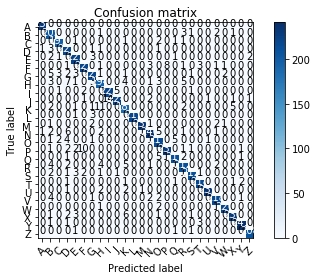

knn classifier : f1 macro = 95.05%, f1 micro = 95.05%


In [13]:
print_clf_stats('knn', KNeighborsClassifier())

Σε αυτό το dataset ο kNN και χωρίς hyperparameter tuning έχει πολύ καλή επίδοση. Να σημειώσουμε πως το σχετικό ισορροπημένο dataset οδηγεί στο να είναι πολύ κοντά τα macro και micro score, σε όλους τους ταξινομητές.

#### Multi-Layer Perceptron

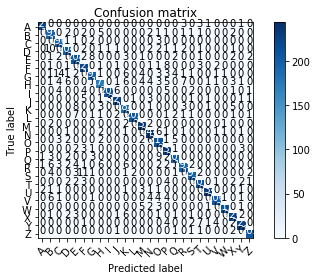

mlp classifier : f1 macro = 91.41%, f1 micro = 91.43%


In [14]:
print_clf_stats('mlp', MLPClassifier())

### Bar plot

In [15]:
def print_bar_plot(when, best=False):
  if best:
    clfs_ = clfs[1:]
  else:
    clfs_ = clfs
  y_pos = np.arange(len(clfs_))

  for i,sc in enumerate(metrics):

    plt.subplot(1,2,1+i)
    if best:
      y_s = [when[sc][x][2] for x in clfs_]
    else:
      y_s = [when[sc][x] for x in clfs_]
    plt.bar(y_pos, y_s, align='center', alpha=0.5)
    plt.xticks(y_pos, clfs_)
    plt.ylabel('Score')
    plt.title('F1-{} average score'.format(sc))

  plt.show()

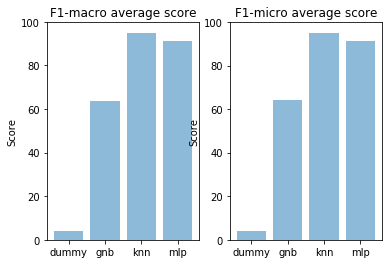

In [16]:
print_bar_plot(before)

Εδώ βλέπουμε συγκριτικά τους ταξινομητές. Ο kNN έχει την καλύτερη επίδοση. Όπως αναφέραμε τα macro και micro scores είναι σχεδόν ίδια.

## Βελτιστοποίηση ταξινομητών

### Προεπεξεργασία

Το dataset μας δεν έχει ούτε απουσιάζουσες τιμές ούτε κατηγορικές μεταβλητές άρα σε ότι αφορά την επεξεργασία πρέπει μόνο να επιλέξουμε και να εξάγουμε κατάλληλα χαρακτηριστικά.

Variance Threshold:

In [17]:
from sklearn.feature_selection import VarianceThreshold
vt = VarianceThreshold()
train_reduced = vt.fit_transform(X_train)
np.all(vt.get_support())

True

Παρατηρούμε πως όλες οι μεταβλητές έχουν θετική διασπορά άρα θα εφαρμόσουμε πρώτα έναν MinMaxScaler ώστε μετά να δοκιμάσουμε κάποιον VarianceThreshold transformer με θετικό κατώφλι.

Variance from 0.01062 to 0.04857


C:\Users\Vlassis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


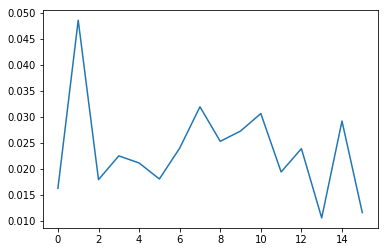

In [18]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
mm_scaler = MinMaxScaler()
X_train_scaled = mm_scaler.fit_transform(X_train)
scaled_var = X_train_scaled.var(axis=0)
print('Variance from {:.5f} to {:.5f}'.format(scaled_var.min()
                                             , scaled_var.max()))
plt.plot(scaled_var)
plt.show()

Μία υπερπαράμετρος που πρέπει να προσδιορίσουμε είναι το κατώφλι για τον Variance Threshold transformer.
Παραπάνω βλέπουμε τις τιμές των διασπορών για το κάθε χαρακτηριστικό.

Παρατηρούμε πως γενικά δεν υπάρχει κάποιο χαρακτηριστικό με πολύ μικρή διασπορά σε σχέση με τα άλλα. Επίσης τα χαρακτηριστικά μας δεν είναι πολλά, άρα θα επιλέξουμε να πάρουμε όλα τα χαρακτηριστικά.

Αφού δεν θα χρησιμοποιήσουμε Variance Threshold, ως scaler θα χρησιμοποιήσουμε τον StandarScaler.


Σε ότι αφορά το PCA μοναδική υπερπαράμετρος είναι ο αριθμός των συνιστωσών.

In [19]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings 
warnings.filterwarnings('ignore')

### Εύρεση υπερπαραμέτρων

In [23]:
def print_best_stats(clf, pipe, param_grid, perc=1.0):
  if perc!=1.0:
      _, X_train_l, _, y_train_l = train_test_split(X_train, y_train, test_size=perc)
  else:
    X_train_l, y_train_l = X_train, y_train
  print('X_train_l size : {}'.format(len(X_train_l)))

  gss = {scoring : GridSearchCV(pipe, param_grid, cv=5, 
         scoring='f1_'+scoring, n_jobs=-1) for scoring in metrics}

  for scoring in metrics:
    gss[scoring].fit(X_train_l, y_train_l)
    
    start_time = time.time()
    model = gss[scoring].best_estimator_.fit(X_train_l, y_train_l)
    time_fit[scoring][clf] = time.time() - start_time

    start_time = time.time()
    y_pred = model.predict(X_test)
    time_pred[scoring][clf] = time.time() - start_time

    after[scoring][clf] = gss[scoring].best_params_, \
      y_pred, f1_score(y_test, y_pred, average=scoring)*100

  print("Best model params:")
  pprint.pprint({x : after[x][clf][0] for x in metrics})
  print("Best model CV score:")
  print({x : format(100*gss[x].best_score_, '.2f') for x in metrics})

  for x in metrics:
    print("Confusion Matrix (Best f1_{} model):".format(x)) 
    plot_confusion_matrix(confusion_matrix(y_test, after[x][clf][1]),
                          string.ascii_uppercase)
    print("f1_{} score on test set: {:.2f}\n".format(x, after[x][clf][2]))

Υλοποιήσαμε την παραπάνω συνάρτηση που εκτελεί το GridSearch και θέτει σε ανάλογο dictionary όλα τα αποτελέσματα που θα χρειαστούμε. Έχουμε προσθέσει μία προαιρετική παράμετρο που οδηγεί στο να κάνουμε sample το X_train ώστε να μειώσουμε λίγο τον χρόνο εύρεσης των υπερπαραμέτρων. Θα το χρησιμεύσουμε στον MLP.

#### GNB


O GNB δεν έχει κάποια υπερπαράμετρο άρα μοναδική υπερπαράμετρος στο μοντέλο μας είναι ο αριθμός των συνιστωσών στο PCA.

X_train size : 14000
Best model params:
{'macro': {'pca__n_components': 16}, 'micro': {'pca__n_components': 16}}
Best model CV score:
{'macro': '68.50', 'micro': '68.58'}
Confusion Matrix (Best f1_macro model):


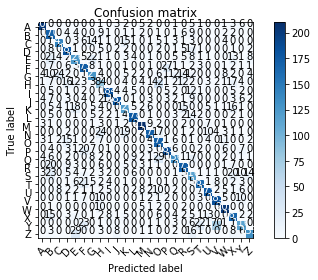

f1_macro score on test set: 69.72

Confusion Matrix (Best f1_micro model):


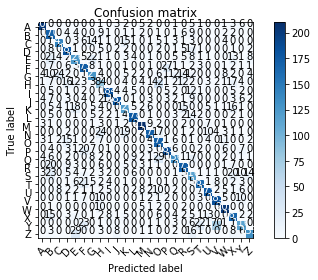

f1_micro score on test set: 69.85



In [21]:
clf = 'gnb'
pipe = Pipeline(steps=[
      ('znorm', StandardScaler()),
      ('pca', PCA()),
      ('gnb', GaussianNB())
    ], memory = 'tmp')
param_grid={
  'pca__n_components': list(range(2,17))
}
print_best_stats(clf, pipe, param_grid)

Παρατηρούμε πως στο βέλτιστο μοντέλο χρησιμοποιούμε όλα τα χαρακτηριστικά στο PCA.

#### kNN


Για τον kNN θα αναζητήσουμε επιπλέον τιμές για 3 υπεραπαραμέτρους τους :
n_neighbors,  metric, weights

X_train size : 14000
Best model params:
{'macro': {'kNN__metric': 'manhattan',
           'kNN__n_neighbors': 5,
           'kNN__weights': 'distance',
           'pca__n_components': 16},
 'micro': {'kNN__metric': 'manhattan',
           'kNN__n_neighbors': 5,
           'kNN__weights': 'distance',
           'pca__n_components': 16}}
Best model CV score:
{'macro': '94.53', 'micro': '94.55'}
Confusion Matrix (Best f1_macro model):


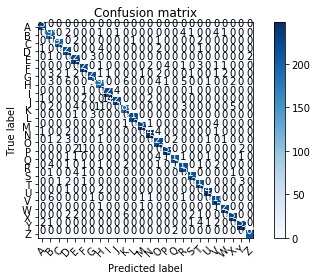

f1_macro score on test set: 95.44

Confusion Matrix (Best f1_micro model):


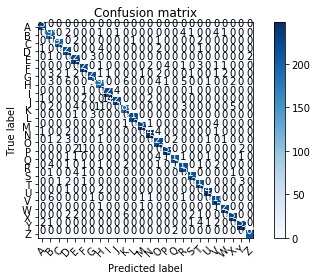

f1_micro score on test set: 95.47



In [22]:
clf = 'knn'
pipe = Pipeline(steps=[
      ('znorm', StandardScaler()),
      ('pca', PCA()),
      ('kNN', KNeighborsClassifier())
    ], memory = 'tmp')
param_grid={
  'pca__n_components': list(range(13,17)),
  'kNN__n_neighbors' : list(range(3,10,2)),
  'kNN__weights' : ['uniform', 'distance'],
  'kNN__metric' : ['euclidean', 'manhattan', 'chebyshev', 'minkowski']
}
print_best_stats(clf, pipe, param_grid)

Πάλι στο βέλτιστο μοντέλο, $pca\_components=16$

#### MLP

Για το MLP θα αναζητήσουμε επιπλέον τιμές για τις παραμέτρους  : activation, solver, max_iter, learning_rate, alpha

X_train_l size : 14000
Best model params:
{'macro': {'mlp__activation': 'relu',
           'mlp__alpha': 0.03,
           'mlp__learning_rate': 'adaptive',
           'mlp__max_iter': 550,
           'mlp__solver': 'adam',
           'pca__n_components': 16},
 'micro': {'mlp__activation': 'relu',
           'mlp__alpha': 0.025,
           'mlp__learning_rate': 'constant',
           'mlp__max_iter': 450,
           'mlp__solver': 'adam',
           'pca__n_components': 16}}
Best model CV score:
{'macro': '94.60', 'micro': '94.47'}
Confusion Matrix (Best f1_macro model):


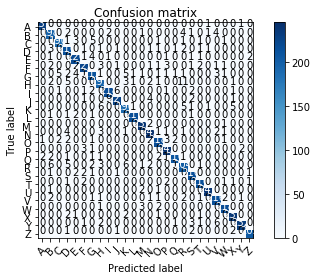

f1_macro score on test set: 94.59

Confusion Matrix (Best f1_micro model):


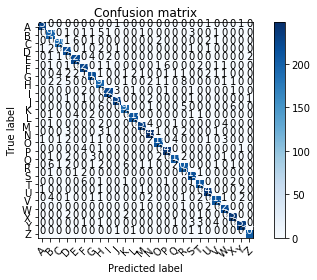

f1_micro score on test set: 94.97



In [39]:
clf = 'mlp'
pipe = Pipeline(steps=[
      ('znorm', StandardScaler()),
      ('pca', PCA()),
      ('mlp', MLPClassifier())
    ], memory = 'tmp')
param_grid={
      'pca__n_components': list(range(15,17)),
      'mlp__activation' : ['relu'], #['identity', 'logistic', 'tanh', 'relu'],
      'mlp__solver' : ['adam'], #['sgd', 'adam'],
      'mlp__learning_rate' : ['constant', 'invscaling', 'adaptive' ],
      'mlp__max_iter' : [450,500, 550, 600], #list(range(250,350,50)), #dunno, may take too long, 
      'mlp__alpha' : [ 0.025, 0.03, 0.035] #[0.0001, 0.001, 0.01] # dunno, 0.0001, 0.0002, 0.0003 maybe?
    }
print_best_stats(clf, pipe, param_grid)

Στο hyperparameter tuning για τον MLP αντιμετωπίσαμε πρόβλημα με τον μεγάλο χρόνο εκτέλεσης. Στις περισσότερες μεταβλητές δεν μπορούσαμε να κάνουμε κάποιο progressive grid search αφού δεν είναι διατεταγμένες. Δοκιμάσαμε να κάνουμε sampling το X_train πχ 20% του dataset(perc παράμετρος στην συνάρτηση print_best_stats) αλλά πάλι ο χρόνος ήταν απαγορευτικός δεδομένων των περιορισμένων υπολογιστικών πόρων που διαθέτουμε. Έτσι κάναμε αναζήτηση κατά διαστάσεις (fix μερικές παραμέτρους και αναζήτηση στις υπόλοιπες). Δεν εγγυούμαστε έτσι πως θα βρούμε την καλύτερη λύση αλλά δεν υπήρχε άλλη επιλογή.

Με τις προεπιλεγμένες τιμές για τις alpha, max_iter βρήκαμε στο 30% του dataset πως καλύτερες τιμές για τις άλλες παραμέτρους ήταν : relu activation και adams solver. Για pca_components δοκιμάσαμε μόνο τις 5 μεγαλύτερες τιμές, δεδομένου πως όλοι οι ταξινομητές είχαν καλύτερο score για την μέγιστη τιμή.

Εν τέλει αφού περιορίσαμε αρκετά το εύρος των πρώτων 3 παραμέτρων βάσει του προηγούμενου search, δοκιμάσαμε μία μεγάλη εκτέλεση που φαίνεται στο παραπάνω κελί. Βλέπουμε πως υπάρχει ορατή βελτίωση.

### Χρόνος εκτέλεσης

In [40]:
print("Time elapsed")
row_labels = ["{}-{}".format(a,b) for a,b in itertools.product(['fit', 'predict'],metrics)]
time_fit_ar = np.array([[time_fit[y][x] for x in clfs[1:]] for y in metrics])
time_pred_ar = np.array([[time_pred[y][x] for x in clfs[1:]] for y in metrics])
both_ar = np.concatenate((time_fit_ar, time_pred_ar), axis = 0)
time_df = pd.DataFrame(both_ar, columns=clfs[1:], index=row_labels)
print(time_df)

Time elapsed
                    gnb       knn        mlp
fit-macro      0.198101  0.171864  14.391922
fit-micro      0.140626  0.157050  16.039675
predict-macro  0.031234  1.359592   0.018410
predict-micro  0.031233  1.300380   0.014131


Σε ότι αφορά το fit, οι GNB και kNN είναι αρκετά γρήγοροι, ενώ ο mlp χρειάζεται αρκετά παραπάνω χρόνο, περίπου δύο τάξεις μεγέθους. Στο predict όμως πιο αργός είναι ο kNN αφού είναι μη παραμετρικός και ελέγχει όλα τα δείγματα που είδε κατά το training.

### Bar plot

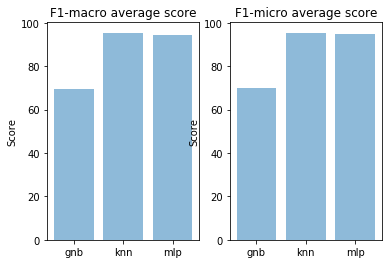

In [41]:
print_bar_plot(after, True)

Πλέον μετά το hyperparameter tuning ο MLP έχει εξίσου καλό score με τον kNN.

### Μεταβολή επίδοσης

In [42]:
print("Test score difference after tuning (%)")
diff_array = np.array([[format(after[x][c][2] - before[x][c] , '.2f') for c in clfs[1:]] for x in metrics])
diff_df = pd.DataFrame(diff_array, columns=clfs[1:], index=metrics)
print(diff_df)

Test score difference after tuning (%)
        gnb   knn   mlp
macro  5.91  0.39  3.18
micro  5.50  0.42  3.53


Παρατηρούμε πως στον GNB και στον MLP έχουμε βελτίωση στην απόδοση. Στον kNN η βελτίωση είναι σχεδόν αμελητέα, αφού πρακτικά το μόνο που κάναμε είναι να προσθέσουμε ένα Standard Scaler. Επίσης το score ήταν ήδη αρκετά υψηλό και δεν μπορούν να αποφευχθούν κάποια missprediction (άλλωστε έχουμε και 26 κλάσεις).